In [1]:
import pandas as pd
import numpy as np
#declaring all the packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Reading and cleaning data 

In [2]:
df=pd.read_csv("data.csv")

/home/anjali/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,6,7,9,10,11,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(df.columns)

Index(['Sl. No.', 'YEAR ', 'MONTH ', 'DATE', 'ORIGIN TIME', 'Unnamed: 5',
       'MAGNITUDE', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'LAT (N)', 'LONG (E)', 'DEPTH (km)', 'INTENSITY',
       'Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'REFERENCE'],
      dtype='object')


Index(['Sl. No.', 'YEAR ', 'MONTH ', 'DATE', 'ORIGIN TIME', 'Unnamed: 5',
       'MAGNITUDE', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'LAT (N)', 'LONG (E)', 'DEPTH (km)', 'INTENSITY',
       'Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'REFERENCE'],
      dtype='object')


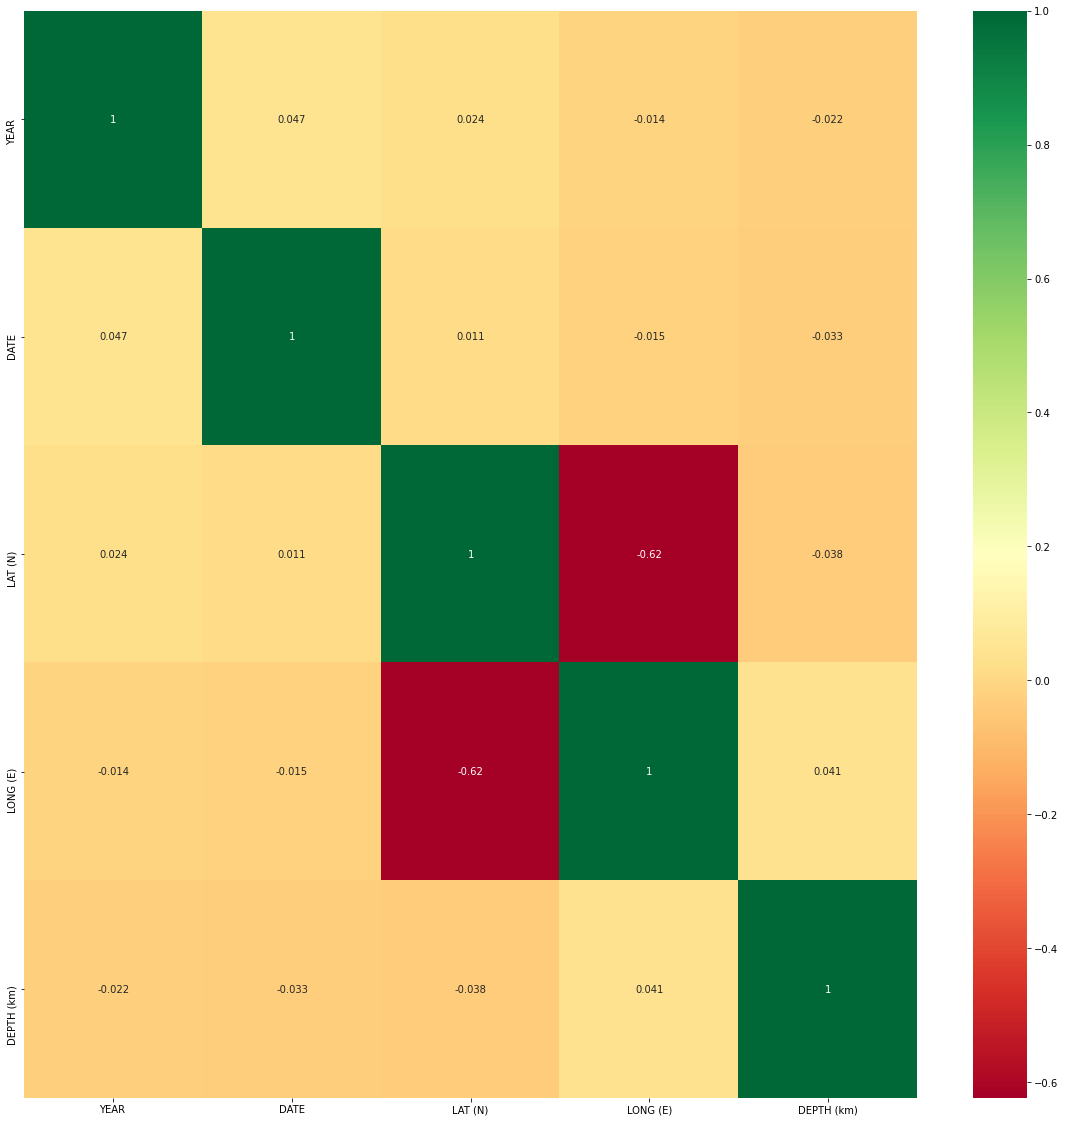

In [65]:
import seaborn as sns
df=pd.read_csv("data.csv")
print(df.columns)
df1 = df[df.columns[col_useful]]
df1 = df1.iloc[1:,]

#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
#we will only consider the necessary columns for prediction 
col_useful=[1,2,3,6,12,13,14]
df1 = df[df.columns[col_useful]]
df1 = df1.iloc[1:,]
#print(df1)

In [6]:
#processing data
#replacing empty data with nan
data = df1.replace(r'\s+',np.nan, regex=True)
#removing entries where magnitude is zero coordinates are not given 
data = data.dropna(subset=['MAGNITUDE'])
data = data.dropna(subset=['LAT (N)'])
data = data.dropna(subset=['LONG (E)'])
data = data.apply(pd.to_numeric)
#replacing nan values from various columns
data['YEAR '] = data['YEAR '].fillna(0)
data['MONTH '] = data['MONTH '].fillna(0)
data['DATE'] = data['DATE'].fillna(0)
data['DEPTH (km)'] = data['DEPTH (km)'].fillna(data['DEPTH (km)'].mean())
#data['LAT (N)'] = data['LAT (N)'].fillna(-1)
#data['LONG (E)'] = data['LONG (E)'].fillna(-1)
#removing special characters from long and lat


In [7]:
print(data)

        YEAR   MONTH   DATE  MAGNITUDE  LAT (N)  LONG (E)  DEPTH (km)
1     -2474.0     0.0   0.0     7.5000     71.0     24.00    0.000000
2      -325.0     0.0   0.0     7.5000     71.0     24.00    0.000000
3        25.0     0.0   0.0     7.5000     72.9     33.72    0.000000
4        26.0     5.0  10.0     6.1397     17.3     80.10   47.063533
5        26.0     5.0  10.0     6.1397     26.0     97.00   80.000000
...       ...     ...   ...        ...      ...       ...         ...
52985  2019.0     7.0  28.0     3.2000     32.8     78.40   10.000000
52986  2019.0     7.0  28.0     3.6000     25.5     90.40   70.000000
52987  2019.0     7.0  28.0     4.0000     23.2     86.50   22.000000
52988  2019.0     7.0  29.0     4.3000     32.8     76.40   20.000000
52989  2019.0     7.0  31.0     3.0000     20.0     72.80   10.000000

[40935 rows x 7 columns]


In [1]:
#separating the magnitude column and creating the labels column on the basis of that

In [15]:
#choosing a value of magnitude btw 4 and 5 on the basis of which we will classify
def model_decisionTree(X,Y,count):
    labels=list()
    for i in Y:
        if(float(i)>= 4.1):
            labels.append(1)
        else:
            labels.append(0)
    #labels=pd.DataFrame(labels)
    train_x,test_x,train_y,y_test= train_test_split(X, labels, test_size=0.2, random_state=1)
    #Apply decision trees
    clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=count)
    clf = clf.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    y_p=list(y_pred)
    actual_no=0
    actual_yes=0
    tp=0
    fp=0
    for i in range(len(y_p)):
        if(y_test[i]==1):
            actual_yes=actual_yes+1
        else:
            actual_no=actual_no+1
        if(y_p[i]==1):
            if(y_test[i]==1):
                tp=tp+1
            else:
                fp=fp+1
                
    #print metrics
    fpp=fp/actual_no
    tpp=tp/actual_yes
   
    print("RESULTS")
    print("Feature Importances/Gini Importances")
    print(list(test_x.columns))
    print(clf.feature_importances_)
    print("")
    print("Depth of tree: ",clf.get_depth())
    print("No. of leaf nodes: ",clf.get_n_leaves())
    print("")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("Precision Score:",metrics.precision_score(y_test, y_pred))
    print("F1 Score:",metrics.f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test,y_pred))
    print("")
    pred_prob = clf.predict_proba(test_x)
    fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    print(type(fpr))
    print(type(tpr))
    print(type(roc_auc))
    return fpr,tpr,roc_auc,fpp,tpp

    

    



In [16]:
fp_l=list()
tp_l=list()
auc_l=list()
fp=list()
tp=list()
t1,t2,t3,t4,t5=model_decisionTree(X,Y,6)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)



RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.34941359 0.00439327 0.00321531 0.57111885 0.04546713 0.02639185]

Depth of tree:  6
No. of leaf nodes:  59

Accuracy: 0.8664956638573348
Recall: 0.951948051948052
Precision Score: 0.8966970232431698
F1 Score: 0.9234968852803248
Confusion Matrix:
[[ 497  760]
 [ 333 6597]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [17]:
t1,t2,t3,t4,t5=model_decisionTree(X,Y,10)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)



RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.29421086 0.02411211 0.02387474 0.46615497 0.11213526 0.07951206]

Depth of tree:  10
No. of leaf nodes:  430

Accuracy: 0.8617320141688042
Recall: 0.9574314574314574
Precision Score: 0.8879817987152034
F1 Score: 0.9213998055825579
Confusion Matrix:
[[ 420  837]
 [ 295 6635]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [18]:
t1,t2,t3,t4,t5=model_decisionTree(X,Y,15)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)



RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.20537731 0.05731491 0.08806498 0.3759958  0.17615626 0.09709073]

Depth of tree:  15
No. of leaf nodes:  2012

Accuracy: 0.83400513008428
Recall: 0.9147186147186147
Precision Score: 0.8919375263824398
F1 Score: 0.9031844411198973
Confusion Matrix:
[[ 489  768]
 [ 591 6339]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [19]:
t1,t2,t3,t4,t5=model_decisionTree(X,Y,20)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)



RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.167437   0.07157891 0.11646664 0.3348059  0.20414501 0.10556654]

Depth of tree:  20
No. of leaf nodes:  3893

Accuracy: 0.807621839501649
Recall: 0.8875901875901876
Precision Score: 0.8854181661148697
F1 Score: 0.8865028464365498
Confusion Matrix:
[[ 461  796]
 [ 779 6151]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [20]:
t1,t2,t3,t4,t5=model_decisionTree(X,Y,25)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)



RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.16264358 0.07771711 0.12277449 0.32789598 0.20392884 0.10504001]

Depth of tree:  25
No. of leaf nodes:  4622

Accuracy: 0.7979723952607792
Recall: 0.874025974025974
Precision Score: 0.8857853173442527
F1 Score: 0.8798663567693202
Confusion Matrix:
[[ 476  781]
 [ 873 6057]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [21]:
t1,t2,t3,t4,t5=model_decisionTree(X,Y,30)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)



RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.15993996 0.07993438 0.12616024 0.32555597 0.20331248 0.10509697]

Depth of tree:  30
No. of leaf nodes:  4793

Accuracy: 0.7956516428484183
Recall: 0.8694083694083694
Precision Score: 0.8869424407478287
F1 Score: 0.8780878816585296
Confusion Matrix:
[[ 489  768]
 [ 905 6025]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [22]:
t1,t2,t3,t4,t5=model_decisionTree(X,Y,34)
fp_l.append(t1)
tp_l.append(t2)
auc_l.append(t3)
fp.append(t4)
tp.append(t5)


RESULTS
Feature Importances/Gini Importances
['YEAR ', 'MONTH ', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)']
[0.16171899 0.07848191 0.12600215 0.32610754 0.20258195 0.10510747]

Depth of tree:  34
No. of leaf nodes:  4826

Accuracy: 0.7944301942103335
Recall: 0.8666666666666667
Precision Score: 0.8878048780487805
F1 Score: 0.8771084337349399
Confusion Matrix:
[[ 498  759]
 [ 924 6006]]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [26]:
print(fp)

[0.6046141607000796, 0.665871121718377, 0.6109785202863962, 0.6332537788385044, 0.6213206046141607, 0.6109785202863962, 0.60381861575179]


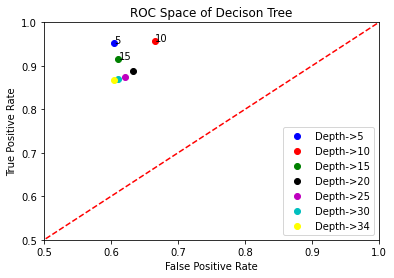

In [36]:
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
n=[5,10,15]
plt.scatter(fp[0], tp[0], c ="blue", label="Depth->5") 
plt.scatter(fp[1], tp[1], c ="red", label="Depth->10") 
plt.scatter(fp[2], tp[2], c ="g", label="Depth->15") 
plt.scatter(fp[3], tp[3], c ="black", label="Depth->20") 
plt.scatter(fp[4], tp[4], c ="m", label="Depth->25") 
plt.scatter(fp[5], tp[5], c ="c", label="Depth->30") 
plt.scatter(fp[6], tp[6], c ="yellow", label="Depth->34") 



for i, txt in enumerate(n):
    plt.annotate(txt, (fp[i], tp[i]))
  


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.5, 1])
plt.ylim([0.5, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Space of Decison Tree')
plt.show()

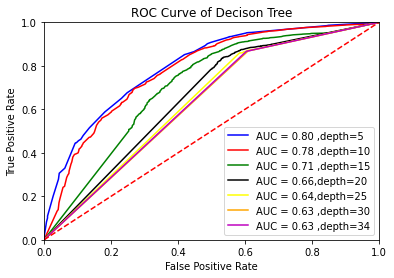

In [24]:
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')

plt.plot(fp_l[0], tp_l[0], 'b', label = 'AUC = %0.2f ,depth=5' % auc_l[0])
plt.plot(fp_l[1], tp_l[1], 'r', label = 'AUC = %0.2f ,depth=10' % auc_l[1])
plt.plot(fp_l[2], tp_l[2], 'g', label = 'AUC = %0.2f ,depth=15' % auc_l[2])
plt.plot(fp_l[3], tp_l[3], 'black', label = 'AUC = %0.2f,depth=20' % auc_l[3])
plt.plot(fp_l[4], tp_l[4], 'yellow', label = 'AUC = %0.2f,depth=25' % auc_l[4])
plt.plot(fp_l[5], tp_l[5], 'orange', label = 'AUC = %0.2f ,depth=30' % auc_l[5])
plt.plot(fp_l[6], tp_l[6], 'm', label = 'AUC = %0.2f ,depth=34' % auc_l[6])



plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decison Tree')
plt.show()

model_decisionTree(4.3,X,Y)

In [51]:
#knn model for classification
from sklearn.neighbors import KNeighborsClassifier
def knn_model(k,X,Y):
    labels=list()
    for i in Y:
        if(float(i)>=4.1):
            labels.append(1)
        else:
            labels.append(0)
    
    train_x,test_x,train_y,test_y= train_test_split(X, labels, test_size=0.2, random_state=1)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x,train_y)
    y_pred=model.predict(test_x)
    y_p=list(y_pred.ravel())
   
    actual_no=0
    actual_yes=0
    tp=0
    fp=0
    for i in range(len(y_p)):
        if(test_y[i]==1):
            actual_yes=actual_yes+1
        else:
            actual_no=actual_no+1
        if(y_p[i]==1):
            if(test_y[i]==1):
                tp=tp+1
            else:
                fp=fp+1
                
    #print metrics
    fpp=fp/actual_no
    tpp=tp/actual_yes
    print("\n-------")
    print("RESULTS")
    print("-------")
    print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
    print("Recall:",metrics.recall_score(test_y, y_pred))
    print("Precision Score:",metrics.precision_score(test_y, y_pred))
    print("F1 Score:",metrics.f1_score(test_y, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(test_y,y_pred))
    pred_prob = model.predict_proba(test_x)
    fpr, tpr, threshold = roc_curve(test_y, pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    
    return fpr,tpr,roc_auc,fpp,tpp


    

In [18]:
knn_model(10,X,Y)

<ipython-input-17-8228b4ef4860>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(train_x,train_y)



-------
RESULTS
-------
Accuracy: 0.8552583363869549
Recall: 0.9425685425685426
Precision Score: 0.8924716491323952
F1 Score: 0.9168362692118746
Confusion Matrix:
[[ 470  787]
 [ 398 6532]]


In [19]:
knn_model(5,X,Y)

<ipython-input-17-8228b4ef4860>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(train_x,train_y)



-------
RESULTS
-------
Accuracy: 0.8481739342860632
Recall: 0.9414141414141414
Precision Score: 0.8862926232848798
F1 Score: 0.9130221817927368
Confusion Matrix:
[[ 420  837]
 [ 406 6524]]


In [20]:
knn_model(20,X,Y)

<ipython-input-17-8228b4ef4860>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(train_x,train_y)



-------
RESULTS
-------
Accuracy: 0.8590448271650177
Recall: 0.9520923520923521
Precision Score: 0.8892183288409703
F1 Score: 0.9195818815331009
Confusion Matrix:
[[ 435  822]
 [ 332 6598]]


In [52]:
fp_list=list()
tp_list=list()
auc_list=list()
fp=list()
tp=list()
t1,t2,t3,t4,t5=knn_model(1,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)
t1,t2,t3,t4,t5=knn_model(5,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)
t1,t2,t3,t4,t5=knn_model(10,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)
t1,t2,t3,t4,t5=knn_model(15,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)
t1,t2,t3,t4,t5=knn_model(20,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)
t1,t2,t3,t4,t5=knn_model(25,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)
t1,t2,t3,t4,t5=knn_model(50,X,Y)
fp_list.append(t1)
tp_list.append(t2)
auc_list.append(t3)
fp.append(t4)
tp.append(t5)



-------
RESULTS
-------
Accuracy: 0.8095761573225846
Recall: 0.8854256854256854
Precision Score: 0.8891465005071729
F1 Score: 0.8872821921769937
Confusion Matrix:
[[ 492  765]
 [ 794 6136]]

-------
RESULTS
-------
Accuracy: 0.8481739342860632
Recall: 0.9414141414141414
Precision Score: 0.8862926232848798
F1 Score: 0.9130221817927368
Confusion Matrix:
[[ 420  837]
 [ 406 6524]]

-------
RESULTS
-------
Accuracy: 0.8552583363869549
Recall: 0.9425685425685426
Precision Score: 0.8924716491323952
F1 Score: 0.9168362692118746
Confusion Matrix:
[[ 470  787]
 [ 398 6532]]

-------
RESULTS
-------
Accuracy: 0.8617320141688042
Recall: 0.9581529581529582
Precision Score: 0.8874632451216252
F1 Score: 0.9214543436025534
Confusion Matrix:
[[ 415  842]
 [ 290 6640]]

-------
RESULTS
-------
Accuracy: 0.8590448271650177
Recall: 0.9520923520923521
Precision Score: 0.8892183288409703
F1 Score: 0.9195818815331009
Confusion Matrix:
[[ 435  822]
 [ 332 6598]]

-------
RESULTS
-------
Accuracy: 0.86356418

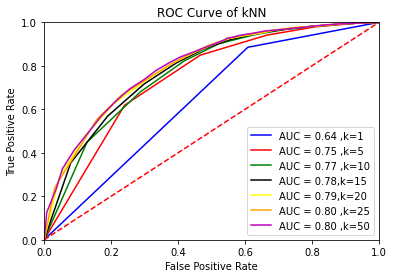

In [53]:

plt.title('Receiver Operating Characteristic')


plt.plot(fp_list[0], tp_list[0], 'b', label = 'AUC = %0.2f ,k=1' % auc_list[0])
plt.plot(fp_list[1], tp_list[1], 'r', label = 'AUC = %0.2f ,k=5' % auc_list[1])
plt.plot(fp_list[2], tp_list[2], 'g', label = 'AUC = %0.2f ,k=10' % auc_list[2])
plt.plot(fp_list[3], tp_list[3], 'black', label = 'AUC = %0.2f,k=15' % auc_list[3])
plt.plot(fp_list[4], tp_list[4], 'yellow', label = 'AUC = %0.2f,k=20' % auc_list[4])
plt.plot(fp_list[5], tp_list[5], 'orange', label = 'AUC = %0.2f ,k=25' % auc_list[5])
plt.plot(fp_list[6], tp_list[6], 'm', label = 'AUC = %0.2f ,k=50' % auc_list[6])


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

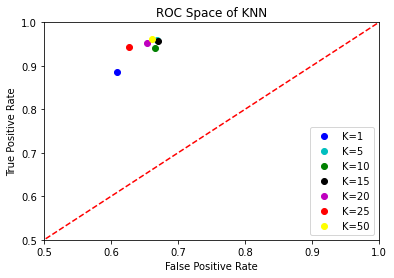

In [57]:
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
n=[]
plt.scatter(fp[0], tp[0], c ="blue", label="K=1") 
plt.scatter(fp[5], tp[5], c ="c", label="K=5") 
plt.scatter(fp[1], tp[1], c ="g", label="K=10") 
plt.scatter(fp[3], tp[3], c ="black", label="K=15") 
plt.scatter(fp[4], tp[4], c ="m", label="K=20") 

plt.scatter(fp[2], tp[2], c ="red", label="K=25") 
plt.scatter(fp[6], tp[6], c ="yellow", label="K=50") 






plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.5, 1])
plt.ylim([0.5, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Space of KNN')
plt.show()

In [101]:
#Considering only 2 features for model
# latitude and longitude 
#only useful cols are latitude longitude and Mw
col_useful=[6,12,13]
df2 = df[df.columns[col_useful]]
df2 = df2.iloc[1:,]
#replacing empty data with nan
df2 = df2.replace(r'\s+',np.nan, regex=True)
#removing entries where magnitude is zero coordinates are not given 
df2= df2.dropna(subset=['MAGNITUDE'])
df2 = df2.dropna(subset=['LAT (N)'])
df2 = df2.dropna(subset=['LONG (E)'])
df2 = df2.apply(pd.to_numeric)


In [102]:
print(df2)

       MAGNITUDE  LAT (N)  LONG (E)
1         7.5000     71.0     24.00
2         7.5000     71.0     24.00
3         7.5000     72.9     33.72
4         6.1397     17.3     80.10
5         6.1397     26.0     97.00
...          ...      ...       ...
52985     3.2000     32.8     78.40
52986     3.6000     25.5     90.40
52987     4.0000     23.2     86.50
52988     4.3000     32.8     76.40
52989     3.0000     20.0     72.80

[40935 rows x 3 columns]


In [120]:
y= df2['MAGNITUDE']
x = df2.drop(data.columns[3],axis=1)
label=list()
for i in y:
    if(float(i)>= 4.1):
        label.append(1)
    else:
        label.append(0)
train_x,test_x,train_y,y_test= train_test_split(x, label, test_size=0.2, random_state=1)
#Apply decision trees
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=7)
clf = clf.fit(train_x,train_y)
y_pred = clf.predict(test_x)
#print metrics
print("RESULTS")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_pred))


RESULTS
Accuracy: 0.8503725418346159
Recall: 0.9897546897546897
Precision Score: 0.8559840259578185
F1 Score: 0.9180218162350264
Confusion Matrix:
[[ 103 1154]
 [  71 6859]]


In [125]:
#considering only latitude and depth
#Considering only 2 features for model

#only useful cols are latitude longitude and Mw
col_useful=[6,12,14]
df2 = df[df.columns[col_useful]]
df2 = df2.iloc[1:,]
#replacing empty data with nan
df2 = df2.replace(r'\s+',np.nan, regex=True)
#removing entries where magnitude is zero coordinates are not given 
df2= df2.dropna(subset=['MAGNITUDE'])
df2 = df2.dropna(subset=['LAT (N)'])

df2 = df2.apply(pd.to_numeric)
df2['DEPTH (km)'] = df2['DEPTH (km)'].fillna(data['DEPTH (km)'].mean())
print(df2)


       MAGNITUDE  LAT (N)  DEPTH (km)
1         7.5000     71.0    0.000000
2         7.5000     71.0    0.000000
3         7.5000     72.9    0.000000
4         6.1397     17.3   47.063533
5         6.1397     26.0   80.000000
...          ...      ...         ...
52985     3.2000     32.8   10.000000
52986     3.6000     25.5   70.000000
52987     4.0000     23.2   22.000000
52988     4.3000     32.8   20.000000
52989     3.0000     20.0   10.000000

[40935 rows x 3 columns]


In [129]:
y= df2['MAGNITUDE']
x = df2.drop(data.columns[3],axis=1)
label=list()
for i in y:
    if(float(i)>= 4.1):
        label.append(1)
    else:
        label.append(0)
train_x,test_x,train_y,y_test= train_test_split(x, label, test_size=0.2, random_state=1)
#Apply decision trees
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6)
clf = clf.fit(train_x,train_y)
y_pred = clf.predict(test_x)
#print metrics
print("RESULTS")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_pred))

RESULTS
Accuracy: 0.8503725418346159
Recall: 0.9744588744588745
Precision Score: 0.8656582489424433
F1 Score: 0.9168420338062588
Confusion Matrix:
[[ 209 1048]
 [ 177 6753]]


In [131]:
#considering only latitude and year
col_useful=[1,6,12]
df2 = df[df.columns[col_useful]]
df2 = df2.iloc[1:,]
#replacing empty data with nan
df2 = df2.replace(r'\s+',np.nan, regex=True)
#removing entries where magnitude is zero coordinates are not given 
df2= df2.dropna(subset=['MAGNITUDE'])
df2 = df2.dropna(subset=['LAT (N)'])


df2 = df2.apply(pd.to_numeric)
df2['YEAR '] = df2['YEAR '].fillna(0)

print(df2)


        YEAR   MAGNITUDE  LAT (N)
1     -2474.0     7.5000     71.0
2      -325.0     7.5000     71.0
3        25.0     7.5000     72.9
4        26.0     6.1397     17.3
5        26.0     6.1397     26.0
...       ...        ...      ...
52985  2019.0     3.2000     32.8
52986  2019.0     3.6000     25.5
52987  2019.0     4.0000     23.2
52988  2019.0     4.3000     32.8
52989  2019.0     3.0000     20.0

[40935 rows x 3 columns]


In [133]:
y= df2['MAGNITUDE']
x = df2.drop(data.columns[3],axis=1)
label=list()
for i in y:
    if(float(i)>= 4.1):
        label.append(1)
    else:
        label.append(0)
train_x,test_x,train_y,y_test= train_test_split(x, label, test_size=0.2, random_state=1)
#Apply decision trees
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=7)
clf = clf.fit(train_x,train_y)
y_pred = clf.predict(test_x)
#print metrics
print("RESULTS")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_pred))

RESULTS
Accuracy: 0.8657627946744839
Recall: 0.9525252525252526
Precision Score: 0.8955365622032289
F1 Score: 0.9231522271169847
Confusion Matrix:
[[ 487  770]
 [ 329 6601]]
